# Get Started

[![Google Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=github)](https://colab.research.google.com/github/sflippl/predicode/blob/master/usage/get_started.ipynb)

In [1]:
try:
    import predicode as pc
except:
    !pip install git+https://github.com/sflippl/predicode
    import predicode as pc
try:
    import lazytools_sflippl as lazytools
except: 
    !pip install git+https://github.com/sflippl/lazytools
    import lazytools_sflippl as lazytools

## A minimal model in 60 seconds

A minimal hierarchical predictive coding model consists of a single, densely and linearly connected hidden layer. In itself, it amounts to a simple PCA, but already has interesting consequences, both in its outcome, which is able to explain neural effects such as endstopping, and in its learning trajectory.

To get some data that can well be approximated by a PCA, call pc.DecayingMultiNormal:

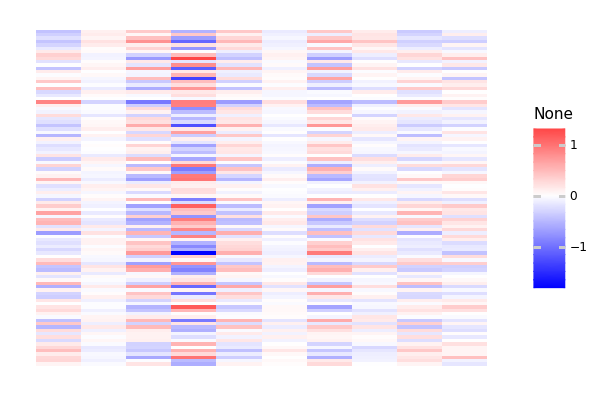

<ggplot: (8760784900369)>

In [2]:
art = pc.decaying_multi_normal(dimensions=10, size=100)
lazytools.matrix_heatmap(art, pole=0)

To fit a minimal model to this data, call pc.MinimalHierarchicalModel:

In [3]:
hpc = pc.MinimalHierarchicalModel(art, weights='pca', latent_dimensions=4)

W0826 13:23:25.600336 140173786113856 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpf6ungpzq


In [4]:
hpc.train(max_steps=1e4, learning_rate=5)

W0826 13:23:39.305405 140173786113856 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpeo15sm9j
W0826 13:23:39.341255 140173786113856 deprecation.py:323] From /home/sflippl/.local/lib/python3.7/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0826 13:23:39.364500 140173786113856 deprecation_wrapper.py:119] From /home/sflippl/.local/lib/python3.7/site-packages/predicode/hierarchical/interfaces/minimal_model.py:59: The name tf.feature_column.input_layer is deprecated. Please use tf.compat.v1.feature_column.input_layer instead.

W0826 13:23:39.366652 140173786113856 deprecation.py:323] From /home/sflippl/.local/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.

### Outcome

In [5]:
hpc.evaluate()

W0826 13:23:46.181127 140173786113856 deprecation.py:323] From /home/sflippl/.local/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


{'loss': 2.7815644e-05, 'global_step': 10000}

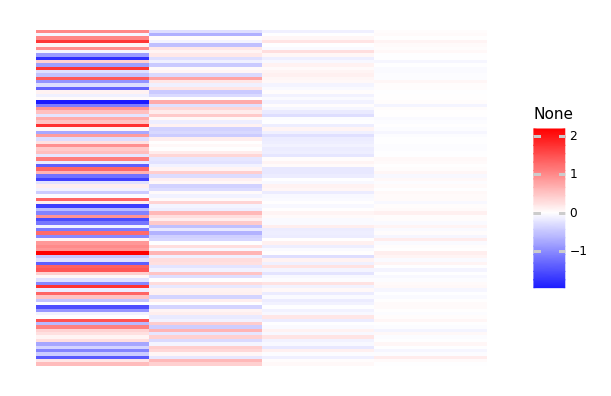

<ggplot: (8760775465813)>

In [6]:
lazytools.matrix_heatmap(hpc.latent_values, pole=0)

W0826 13:23:53.079085 140173786113856 estimator.py:1000] Input graph does not use tf.data.Dataset or contain a QueueRunner. That means predict yields forever. This is probably a mistake.


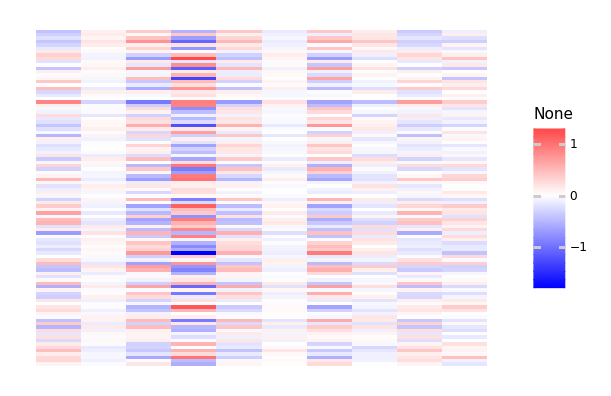

<ggplot: (8760775572757)>

In [7]:
lazytools.matrix_heatmap(hpc.predict(), pole=0)